In [1]:
import pandas as pd
import time
import io
import datetime
import sys
pd.set_option('max_colwidth',150)
%matplotlib inline

### 1.Get the cleaned dataset 

In [2]:
df_abstract= pd.read_pickle('df_allword_Abstract_supervised.pkl')
df_abstract.head(2)

Titre  \
0                       The basics of intravascular optical coherence tomography   
1  An eﬃcient orientation ﬁlter for inertial and inertial/magnetic sensor arrays   

                                                                                                                                                  Resume  \
0  Optical coherence tomography (OCT) has opened new horizons for intravascular coronary imaging. It utilizes near-infrared light to provide a micros...   
1  This report presents a novel orientation ﬁlter applicable to IMUs consisting of tri-axis gyroscopes and accelerometers, and MARG sensor arrays tha...   

                                                     URL  \
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4495121/   
1                                              #item_204   

                   Auteur                     Class  \
0          Roleder Tomasz           Active catheter   
1  Madgwick Sebastian O H  Multi Sensor Data Fusion   

                   ParentClass  \
0  Radiologie interventionelle   
1                           RI   

                                                                                                                                              BagOfWords  
0  basics intravascular optical coherence tomography optical coherence tomography oct opened new horizons intravascular coronary imaging utilizes nea...  
1  eﬃcient orientation ﬁlter inertial inertial magnetic sensor arrays report presents novel orientation ﬁlter applicable imus consisting tri axis gyr...

In [3]:
df_abstract.shape

(391, 7)

In [4]:
len(df_abstract.ParentClass.unique())

11

In [5]:
len(df_abstract.Class.unique())

40

### 2. Encode the target 

In [6]:
from sklearn import preprocessing
#### Prepare the target and the numerique data
le = preprocessing.LabelEncoder()
df_abstract['Target']=le.fit_transform(df_abstract.ParentClass)
df_abstract

Titre  \
0                                                                    The basics of intravascular optical coherence tomography   
1                                               An eﬃcient orientation ﬁlter for inertial and inertial/magnetic sensor arrays   
2                                         Laser-Machined Shape Memory Alloy Sensors for Position Feedback in Active Catheters   
3    Simultaneous tracking of catheters and guidewires: comparison to standard fluoroscopic guidance for arterial cannulation   
4                                                   Development of Active Catheter,Active Guide Wire and Micro Sensor Systems   
..                                                                                                                        ...   
221                                                             Information visualization for selection in Design by Shopping   
222                                   Le Tri Croisé de Monte Carlo : une boite à outils pour l'aide à la décision coopérative   
223                                               Models for Paired Comparison Data: A Review with Emphasis on Dependent Data   
224                                                                   Solar Irradiance Forecasting Using Deep Neural Networks   
225                                                         Detection of Circumstellar Material in a Normal Type Ia Supernova   

                                                                                                                                                    Resume  \
0    Optical coherence tomography (OCT) has opened new horizons for intravascular coronary imaging. It utilizes near-infrared light to provide a micros...   
1    This report presents a novel orientation ﬁlter applicable to IMUs consisting of tri-axis gyroscopes and accelerometers, and MARG sensor arrays tha...   
2    Catheter-based interventions are a form of minimally invasive surgery that can decrease hospitalization time and greatly lower patient morbidity c...   
3    OBJECTIVES: The purpose of this in vitro study was to clinically assess the feasibility of a three-dimensional (3D) electromagnetic (EM) navigator...   
4    Active catheters and active guide wires which move like a snake have been developed for catheter-based minimally invasive diagnosis and therapy. C...   
..                                                                                                                                                     ...   
221  In Design by Shopping, designers explore the design space to gain an insight into trades, and feasible and impractical solutions, as well as to le...   
222  Les méthodes de tri croisé sont des méthodes d'aide à la décision coopérative puisqu'elles permettent d'aboutir à une pondération de critères ou d...   
223  Thurstonian and Bradley–Terry models are the most commonly applied models in the analysis of paired comparison data. Since their introduction, num...   
224  Predicting solar irradiance has been an important topic in renewable energy generation. Prediction improves the planning and operation of photovol...   
225  Type Ia supernovae are important cosmological distance indicators. Each of these bright supernovae supposedly results from the thermonuclear explo...   

                                                                    URL  \
0                 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4495121/   
1                                                             #item_204   
2                 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2598764/   
3                                                             #item_226   
4                 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3627230/   
..                                                                  ...   
221                       https://hal.archives-ouvertes.fr/hal-01438790   
222                       https://hal.archives-ouvertes.fr/hal-00748747   

### 3. Split the dataset into train & test, find BOW on train and transform test 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
def splitDataFrame(df,label):
    split=StratifiedShuffleSplit(n_splits=1,test_size=0.3, random_state=42)
    for train_index, test_index in split.split(df,label):
        strat_train_set=df_abstract.iloc[train_index]
        strat_test_set=df_abstract.iloc[test_index]
    print(strat_train_set.shape,'\n')
    print(strat_test_set.shape,'\n')
    return strat_train_set,strat_test_set

In [8]:
train,test=splitDataFrame(df_abstract,df_abstract.Target)

(273, 8) 

(118, 8) 



###  Visualize the distribution of classes

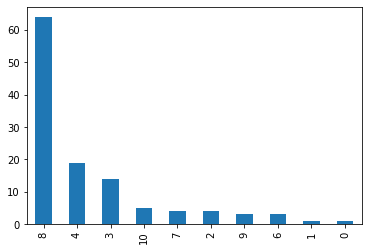

In [9]:
test.Target.value_counts().plot.bar()

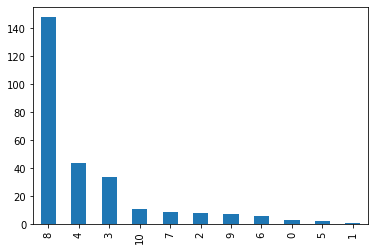

In [10]:
train.Target.value_counts().plot.bar()

### 4.  Convert the abstracts into a simple vector representation (Bag of Words BOW) by CountVectorizer, apply LDA to find the possible topics

In [11]:
import nltk
stop_uk = nltk.corpus.stopwords.words('english')
stop_uk.extend(['paper', 'none', 'image'])

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Load the LDA model from sk-learn
#vec = TfidfVectorizer(ngram_range=(2,2),stop_words = stop_uk,max_df=.8,max_features=300,min_df=10)
vec = TfidfVectorizer(ngram_range=(1,1),stop_words = stop_uk,max_df=.8,max_features=300,min_df=10)
X_train=vec.fit_transform(train.BagOfWords)
X_test=vec.transform(test.BagOfWords)

In [13]:
y_train=train['Target']
y_test=test['Target']

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(273, 300)
(118, 300)
(273,)
(118,)


In [15]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
# Build LDA Model
lda= LDA(n_components=20,               # Number of topics
                                      max_iter=10,               
# Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          
# Random state
                                      batch_size=128,            
# n docs in each learning iter
                                      evaluate_every = -1,       
# compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               
# Use all available CPUs
                                     )

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation as LDA
def gridSearchLDA(data_vectorized):
    # Define Search Param
    search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9],'batch_size':[128,150,200,250],'max_iter':[10,20,25,30,50]}
    # Init the Model
    lda = LDA(max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
    # Init Grid Search Class
    model = GridSearchCV(lda, param_grid=search_params)
    # Do the Grid Search
    model.fit(data_vectorized)
    # Best Model
    best_lda_model = model.best_estimator_
    # Model Parameters
    print("Best Model's Params: ", model.best_params_)
    # Log Likelihood Score
    print("Best Log Likelihood Score: ", model.best_score_)
    return best_lda_model

In [17]:
ldaModel= gridSearchLDA(X_train)
#lda.components_

Best Model's Params:  {'batch_size': 128, 'learning_decay': 0.5, 'max_iter': 50, 'n_components': 10}
Best Log Likelihood Score:  -2355.696608091408


In [18]:
X_train=ldaModel.transform(X_train)

In [19]:
X_test = ldaModel.transform(X_test)

In [20]:
print(X_train.shape)
print(X_test.shape)

(273, 10)
(118, 10)


In [21]:
#y_train.shape

In [22]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
def prepareDataForML(train,test):
    #y=le.fit_transform(df.Class)
    #print(y.shape)
    #### Split the data into train and test
    X_train=train.drop('Target',axis=1)._get_numeric_data()
    X_test=test.drop('Target',axis=1)._get_numeric_data()
    y_train=train.Target
    y_test=test.Target
    #X.shape
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    print(X_train.shape,'\n')
    print(X_test.shape,'\n')
    print(y_train.shape,'\n')
    print(y_test.shape,'\n')
    return X_train, X_test, y_train, y_test

In [23]:
from sklearn.preprocessing import StandardScaler
def normalizeTrainTest(X_train,X_test):
    # On change le format pour que scikitlearn tourne bien
    train_numpy = X_train.to_numpy()
    scaler=StandardScaler()
    # On centre réduit
    train_std = scaler.fit_transform(train_numpy)
    print(train_std.shape)
    # On change le format pour que scikitlearn tourne bien
    test_numpy = X_test.to_numpy()
    # On centre réduit
    test_std = scaler.transform(test_numpy)
    print(test_std.shape)
    return train_std,test_std

#### Split into train, test for the dataset and the target

In [24]:
#X_train, X_test, y_train, y_test=prepareDataForML(train,test)

In [25]:
#X_train

#### Normalize the train and test dataset

In [26]:
#train_std,test_std=normalizeTrainTest(X_train,X_test)

# ML 

## 1. RandomForest

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,roc_auc_score, roc_curve, auc

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
warnings.simplefilter(action='ignore')
%matplotlib inline

### Define the model of RandomForest

In [28]:
from sklearn.metrics import precision_recall_fscore_support as score
def EvaluateModel(model,X_test,y_test, y_predict):
    accuracy=accuracy_score(y_test, y_predict)
    #print('\n','\033[1m' + 'Accuracy score: '+'\033[0m',accuracy) # le plus important pour le moment; précisément la première ligne
    print('\n',classification_report(y_test, y_predict))
    precision,recall,fscore,support=score(y_test,y_predict)
    return precision,recall,fscore,accuracy

In [29]:
def MatrixConfusion(Model, X_test, y_test, y_predict):
    
    cm = confusion_matrix(y_test,y_pred)
    #Afficher la matrice de confusion avec heatmap 
    fig = plt.figure()
    ax = plt.subplot()
    mat = sns.heatmap(cm, annot=True, ax = ax ,fmt='g'); #annot=True to annotate cells
    ax.set_xlabel('Valeurs prédites');ax.set_ylabel('Valeurs réelles'); 
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    return mat

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GroupKFold
def GridSearchRandomForest(X, y):
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.3, random_state = 0)
    
    #cv_sets = StratifiedKFold(10,random_state = 0)
    
    #group=X['Pclass'].to_numpy()
    #cv_sets= list(GroupKFold( n_splits=3).split(X,y,group))
    
    # Create a decision tree classifier object
    classifier = RandomForestClassifier(random_state = 42)

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    #params = {'max_depth':range(1, 20),'criterion': ['gini', 'entropy'],'max_features':range(1,17),'oob_score':[True,False],'min_samples_split':range(2,10),'max_leaf_nodes':range(5,15)}
    params = {'max_depth':range(1, 40),'criterion': ['gini', 'entropy']}

    # Create the grid search cv object --> GridSearchCV()
    # (estimator, param_grid, scoring, cv) which have values 'classifier','scoring', 'params', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=classifier, param_grid=params,scoring='accuracy', cv=cv_sets,n_jobs=-1)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [31]:
gridModel=GridSearchRandomForest(X_train,y_train)
gridModel

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [32]:
gridModel.score(X_train,y_train)

0.7032967032967034

In [33]:
y_pred = gridModel.predict(X_test)
# evaluate model
gridRF=EvaluateModel(gridModel,X_test,y_test, y_pred)


               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         4
           3       0.50      0.29      0.36        14
           4       0.47      0.74      0.57        19
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         4
           8       0.78      0.97      0.86        64
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         5

    accuracy                           0.68       118
   macro avg       0.17      0.20      0.18       118
weighted avg       0.55      0.68      0.60       118



Matrice de Confusion avec le modèle de RandomForest


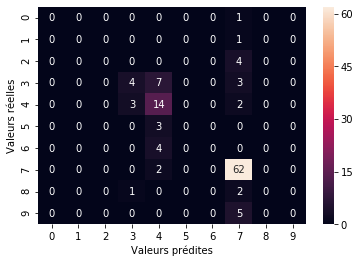

In [34]:
print("Matrice de Confusion avec le modèle de RandomForest")
gridRF=MatrixConfusion(gridModel,X_test,y_test, y_pred)

## 2. SVM 

In [35]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

#pca = PCA(n_components=4, svd_solver='randomized', whiten=True, random_state=42)
#svc = SVC(kernel='rbf', class_weight='balanced')
svc = SVC(kernel='rbf')
#model = make_pipeline(scale, svc)

In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [1, 5, 10, 50,60,80,90,100], # model__parametre
    'gamma': [0.0001, 0.0005, 0.001, 0.005,0.008,0.02,0.04,0.6]
}

grid = GridSearchCV(svc, param_grid,cv=ShuffleSplit(n_splits = 10, test_size = 0.3, random_state = 0))

%time grid.fit(X_train, y_train)
#print(grid.best_params_)

Wall time: 2.1 s


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=None),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50, 60, 80, 90, 100],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.008, 0.02,
                                   0.04, 0.6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [37]:
model = grid.best_estimator_
model

SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.02, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
model.score(X_train,y_train)

0.706959706959707

In [39]:
y_pred = model.predict(X_test)

In [40]:
# evaluate model
gridSVC=EvaluateModel(model,X_test,y_test, y_pred)


               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         4
           3       0.33      0.07      0.12        14
           4       0.49      0.89      0.63        19
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         4
           8       0.76      0.95      0.85        64
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         5

    accuracy                           0.67       118
   macro avg       0.16      0.19      0.16       118
weighted avg       0.53      0.67      0.57       118



In [41]:
print("Matrice de Confusion avec le modèle de SVC")
gridSVC=MatrixConfusion(model, X_test, y_test, y_pred)

Matrice de Confusion avec le modèle de SVC


## 3. LinearSVC

In [42]:
from sklearn.svm import LinearSVC
# Entraîner un classifieur linéaire (LinearSVC et SVC avec kernel='linear'. Quelle différence ?)
clf = LinearSVC(C=50,random_state=0,tol=1e-5)
clf.fit(X_train, y_train)

LinearSVC(C=50, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

In [43]:
clf.score(X_train,y_train)

0.7142857142857143

In [44]:
# evaluate model
linearSVC=EvaluateModel(clf,X_test,y_test, y_pred)


               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         4
           3       0.33      0.07      0.12        14
           4       0.49      0.89      0.63        19
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         4
           8       0.76      0.95      0.85        64
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         5

    accuracy                           0.67       118
   macro avg       0.16      0.19      0.16       118
weighted avg       0.53      0.67      0.57       118



Matrice de Confusion avec le modèle de LinearSVC


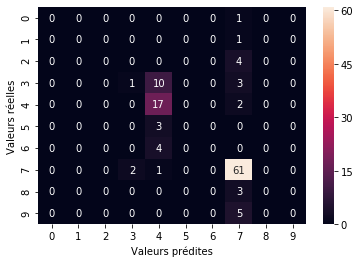

In [45]:
print("Matrice de Confusion avec le modèle de LinearSVC")
gridLinSVC=MatrixConfusion(clf, X_test, y_test, y_pred)

# 4.Naives bayes

In [46]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB

skf = StratifiedKFold(n_splits=10)
params = {}
gnb = GaussianNB()
gs = GridSearchCV(gnb, cv=skf, param_grid=params, return_train_score=True)

gs.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [47]:
y_pred = gs.fit(X_train,y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
       % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 118 points : 83


In [48]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.2966101694915254


Matrice de Confusion avec le modèle de Naives Bayes


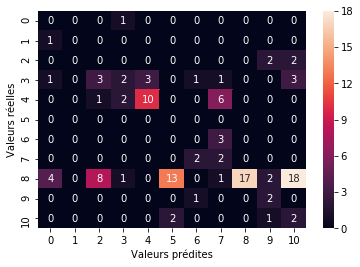

In [49]:
print("Matrice de Confusion avec le modèle de Naives Bayes")
matNaiBa=MatrixConfusion(gs,X_test,y_test, y_pred)

# 5.AdaBoost

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold

ada = AdaBoostClassifier(n_estimators=300, learning_rate=0.01)
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.01,
                   n_estimators=300, random_state=None)

In [51]:
y_pred = ada.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy est', accuracy)
print('Rapport de classification Adaboost')
print('\n',classification_report(y_test, y_pred))

Accuracy est 0.6440677966101694
Rapport de classification Adaboost

               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         4
           3       0.16      0.21      0.18        14
           4       0.50      0.63      0.56        19
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         4
           8       0.81      0.95      0.88        64
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         5

    accuracy                           0.64       118
   macro avg       0.15      0.18      0.16       118
weighted avg       0.54      0.64      0.59       118



Matrice de Confusion avec le modèle de AdaBoost


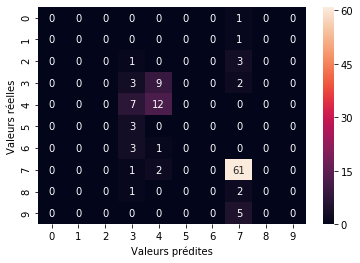

In [52]:
print("Matrice de Confusion avec le modèle de AdaBoost")
matAdB = MatrixConfusion(ada,X_test,y_test, y_pred)

# 6.ClusterCentroids

In [53]:
#Importations des librairies pour le rééchantillonnage
import numpy as np
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC # "Support vector classifier"

Using TensorFlow backend.


In [54]:
param_grid = {
    'C': [1, 5, 10, 50,60,80,90,100], # model__parametre
    'gamma': [0.0001, 0.0005, 0.001, 0.005,0.008,0.02,0.04,0.6]
}

grid = GridSearchCV(svc, param_grid, cv=ShuffleSplit(n_splits = 10, test_size = 0.3, random_state = 0))


In [55]:
#Importation de la librarie
from imblearn.under_sampling import ClusterCentroids

# Sous-échantillonnage par calcul de centroïdes
cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X_train, y_train)

# Entraînement du modèle de SVM optimisé
grid.fit(X_cc, y_cc)

# Affichage des résultats
y_pred = grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy est', accuracy)

print('Rapport de classification avec la méthode de sous échantillonnage de clustering')
print(classification_report_imbalanced(y_test, y_pred))

Accuracy est 0.1864406779661017
Rapport de classification avec la méthode de sous échantillonnage de clustering
                   pre       rec       spe        f1       geo       iba       sup

          0       0.00      0.00      0.94      0.00      0.00      0.00         1
          1       0.00      0.00      1.00      0.00      0.00      0.00         1
          2       0.14      0.25      0.95      0.18      0.49      0.22         4
          3       0.25      0.21      0.91      0.23      0.44      0.18        14
          4       0.59      0.53      0.93      0.56      0.70      0.47        19
          5       0.00      0.00      0.62      0.00      0.00      0.00         0
          6       0.00      0.00      0.96      0.00      0.00      0.00         3
          7       0.00      0.00      0.96      0.00      0.00      0.00         4
          8       1.00      0.12      1.00      0.22      0.35      0.11        64
          9       0.00      0.00      0.90      0.00     

Matrice de Confusion avec le modèle de AdaBoost


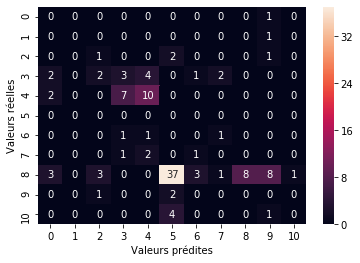

In [56]:
print("Matrice de Confusion avec le modèle de AdaBoost")
matAdB=MatrixConfusion(ada,X_test,y_test, y_pred)